In [2]:
source('helpers.R')
kaggle.house.loadLibraries()

df.combined = kaggle.house.PrepareCombinedDataSet()

df.lot_frontage = df.combined %>% filter(!is.na(LotFrontage))
df.lot_frontage %>% count()

df.lot_frontage.is.na = df.combined %>% filter(is.na(LotFrontage))
df.lot_frontage.is.na %>% count()

n
2433


n
486


In [3]:
df = kaggle.house.groupDataFrame(df.lot_frontage)
df.na = kaggle.house.groupDataFrame(df.lot_frontage.is.na)

df %>%
nest %>%
left_join(df.na %>% nest %>% rename(data.new=data), by='Split.Condition') %>%
mutate(mod = map(data, ~lm(LotFrontage.Log ~ LotArea.Log, .))) %>% 
mutate(
    tidy = map(mod, broom::tidy),
    glance = map(mod, broom::glance),
    augment = map(mod, broom::augment),
    LotFrontage.Log.Pred = map2(mod, data.new, predict)
) %>%
arrange(Split.Condition) -> models

models %>% print

# A tibble: 9 x 8
                              Split.Condition                data
                                        <chr>              <list>
1               1.1 Somerst Neighb. Reg Shape <tibble [113 x 93]>
2           1.2 Somerst Neighb. non-Reg Shape  <tibble [49 x 93]>
3  2.1.1.1 Reg Shape non-2Story Garage Detchd <tibble [452 x 93]>
4  2.1.1.2 Reg Shape non-2Story Garage Attchd <tibble [605 x 93]>
5 2.1.1.3 Reg Shape non-2Story Garage Another <tibble [154 x 93]>
6                      2.1.2 Reg Shape 2Story <tibble [403 x 93]>
7           2.2.1 non-Reg Shape Corner Config <tibble [123 x 93]>
8           2.2.2 non-Reg Shape Inside Config <tibble [433 x 93]>
9          2.2.3 non-Reg Shape Another Config <tibble [101 x 93]>
# ... with 6 more variables: data.new <list>, mod <list>, tidy <list>,
#   glance <list>, augment <list>, LotFrontage.Log.Pred <list>


In [4]:
models %>% select(Split.Condition, tidy) %>% unnest %>% head

Split.Condition,term,estimate,std.error,statistic,p.value
1.1 Somerst Neighb. Reg Shape,(Intercept),-3.2500195,0.09679394,-33.5766836,5.755464e-60
1.1 Somerst Neighb. Reg Shape,LotArea.Log,0.8295389,0.01097842,75.5608461,2.771905e-97
1.2 Somerst Neighb. non-Reg Shape,(Intercept),-0.7273705,0.81326468,-0.8943835,3.756741e-01
1.2 Somerst Neighb. non-Reg Shape,LotArea.Log,0.5424687,0.09037471,6.0024397,2.668880e-07
2.1.1.1 Reg Shape non-2Story Garage Detchd,(Intercept),1.1403487,0.22618328,5.0417019,6.700296e-07
2.1.1.1 Reg Shape non-2Story Garage Detchd,LotArea.Log,0.3300755,0.02515860,13.1197870,1.589916e-33


In [5]:
models %>% select(Split.Condition, glance) %>% unnest %>% head

Split.Condition,r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
1.1 Somerst Neighb. Reg Shape,0.9809293,0.9807575,0.06516072,5709.44146,2.771905e-97,2,149.26043,-292.52086,-284.33870,0.471297,111
1.2 Somerst Neighb. non-Reg Shape,0.4339346,0.4218907,0.30995755,36.02928,2.668880e-07,2,-11.11233,28.22466,33.90012,4.515463,47
2.1.1.1 Reg Shape non-2Story Garage Detchd,0.2766771,0.2750697,0.14934222,172.12881,1.589916e-33,2,219.12671,-432.25342,-419.91237,10.036394,450
2.1.1.2 Reg Shape non-2Story Garage Attchd,0.7336161,0.7331744,0.14745037,1660.65074,2.340109e-175,2,300.67335,-595.34669,-582.13101,13.110192,603
2.1.1.3 Reg Shape non-2Story Garage Another,0.6177439,0.6152290,0.22392848,245.63916,1.486310e-33,2,12.94002,-19.88004,-10.76918,7.621882,152
2.1.2 Reg Shape 2Story,0.8686114,0.8682838,0.17843507,2651.01619,7.967247e-179,2,123.75306,-241.50612,-229.50931,12.767468,401


In [6]:
models %>% select(Split.Condition, augment) %>% unnest %>% head

Split.Condition,LotFrontage.Log,LotArea.Log,.fitted,.se.fit,.resid,.hat,.sigma,.cooksd,.std.resid
1.1 Somerst Neighb. Reg Shape,4.317488,9.218705,4.397256,0.007668166,-0.07976739,0.01384877,0.06500663,0.0106702200,-1.2327295
1.1 Somerst Neighb. Reg Shape,4.430817,9.314340,4.476588,0.008341310,-0.04577140,0.01638690,0.06530816,0.0041786387,-0.7082656
1.1 Somerst Neighb. Reg Shape,3.178054,7.880426,3.287101,0.011801764,-0.10904718,0.03280365,0.06459682,0.0491043561,-1.7016540
1.1 Somerst Neighb. Reg Shape,4.356709,9.230731,4.407231,0.007748208,-0.05052253,0.01413939,0.06527619,0.0043728867,-0.7808929
1.1 Somerst Neighb. Reg Shape,3.688879,8.281724,3.619993,0.008356426,0.06888642,0.01644635,0.06512033,0.0095003347,1.0659792
1.1 Somerst Neighb. Reg Shape,4.317488,9.145802,4.336779,0.007215710,-0.01929115,0.01226271,0.06543006,0.0005508309,-0.2978871


In [7]:
models %>% select(Split.Condition, data.new, LotFrontage.Log.Pred) %>% unnest %>% head

Split.Condition,LotFrontage.Log.Pred,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,⋯,GarageArea.Log,TotRmsAbvGrd.Log,GrLivArea.Log,BldgType2,LotShape2,LotConfig2,GarageType2,HouseStyle.2Story,HouseStyle.1Story,GarageCarsChar
1.1 Somerst Neighb. Reg Shape,3.102387,160,FV,NA,2117,Pave,NA,Reg,Lvl,⋯,6.086775,1.609438,7.329750,Townhouse,Reg,Inside,Detchd,Y,N,2
1.1 Somerst Neighb. Reg Shape,3.102387,160,FV,NA,2117,Pave,NA,Reg,Lvl,⋯,6.086775,1.386294,7.321189,Townhouse,Reg,Inside,Detchd,Y,N,2
1.1 Somerst Neighb. Reg Shape,4.100345,60,FV,NA,7050,Pave,NA,Reg,Lvl,⋯,6.476972,1.945910,7.564757,1Fam,Reg,Inside,Attchd,Y,N,2
1.1 Somerst Neighb. Reg Shape,3.288981,160,FV,NA,2651,Pave,NA,Reg,Lvl,⋯,6.194405,1.791759,7.231287,Townhouse,Reg,CulDSac+FR2+FR3,Detchd,Y,N,2
1.1 Somerst Neighb. Reg Shape,3.102387,160,FV,NA,2117,Pave,NA,Reg,Lvl,⋯,6.086775,1.609438,7.360740,Townhouse,Reg,Inside,Detchd,Y,N,2
1.1 Somerst Neighb. Reg Shape,4.151673,60,FV,NA,7500,Pave,NA,Reg,Lvl,⋯,6.496775,1.945910,7.422971,1Fam,Reg,Inside,Attchd,Y,N,2


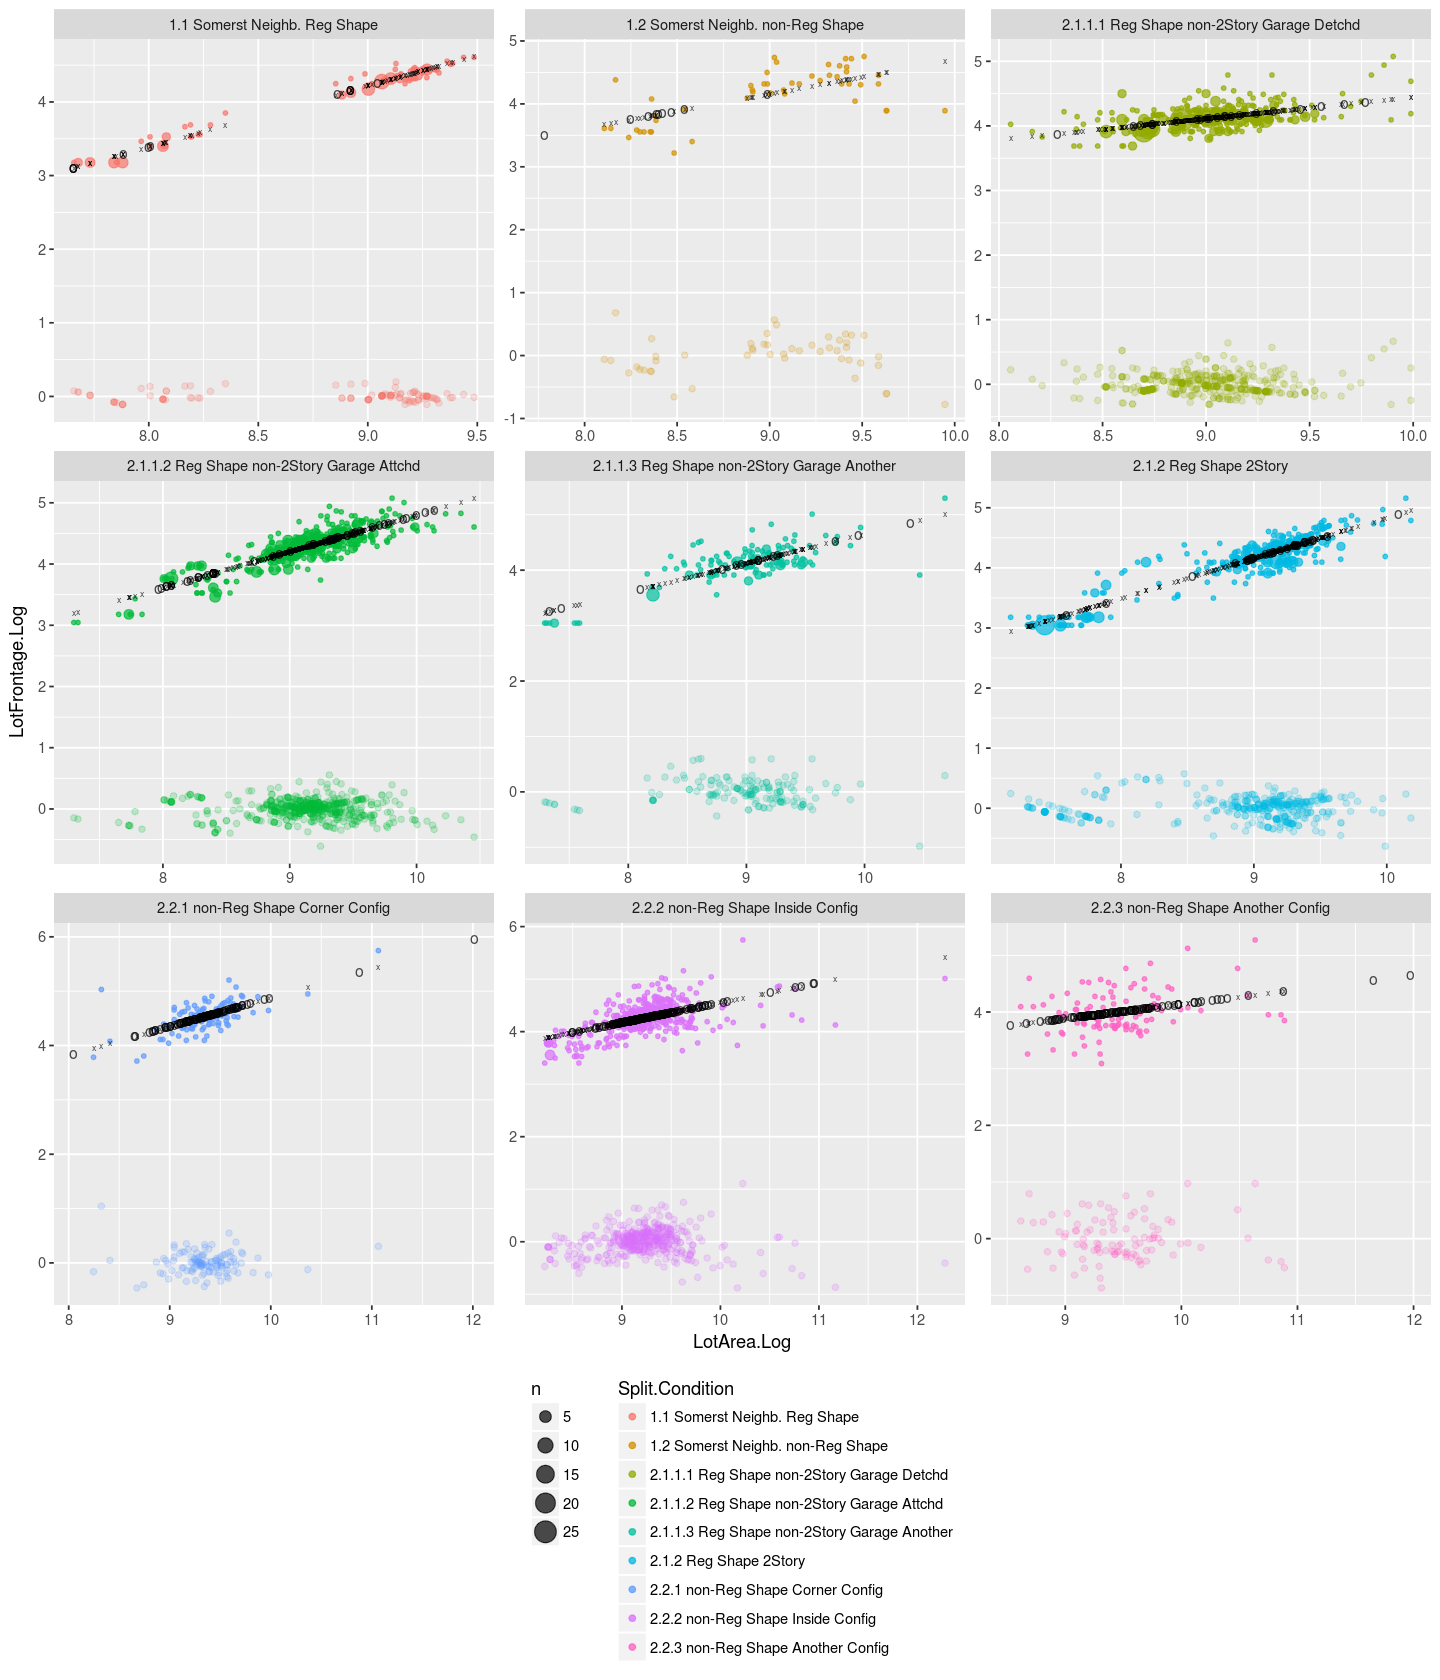

In [24]:
d1 = models %>% select(Split.Condition, augment) %>% unnest
d2 = models %>% select(Split.Condition, data.new, LotFrontage.Log.Pred) %>% unnest

options(repr.plot.width = 12, repr.plot.height = 14)

ggplot() +
geom_count(data=d1, aes(x=LotArea.Log, y=LotFrontage.Log, colour = Split.Condition), alpha=0.7) +
geom_point(data=d1, aes(x=LotArea.Log, y=.fitted), alpha=0.7, color="black", shape='x') +
geom_point(data=d1, aes(x=LotArea.Log, y=.resid, colour=Split.Condition), alpha=0.2) +
#stat_qq(data=d1, aes(sample=.resid, colour=Split.Condition), distribution=qnorm, alpha=0.2) +
geom_point(data=d2, aes(x=LotArea.Log, y=LotFrontage.Log.Pred), alpha=0.7, color="black", shape='o', size=3) +
facet_wrap(~Split.Condition, scales = "free") +
theme(legend.position = "bottom", 
      legend.direction = "vertical")

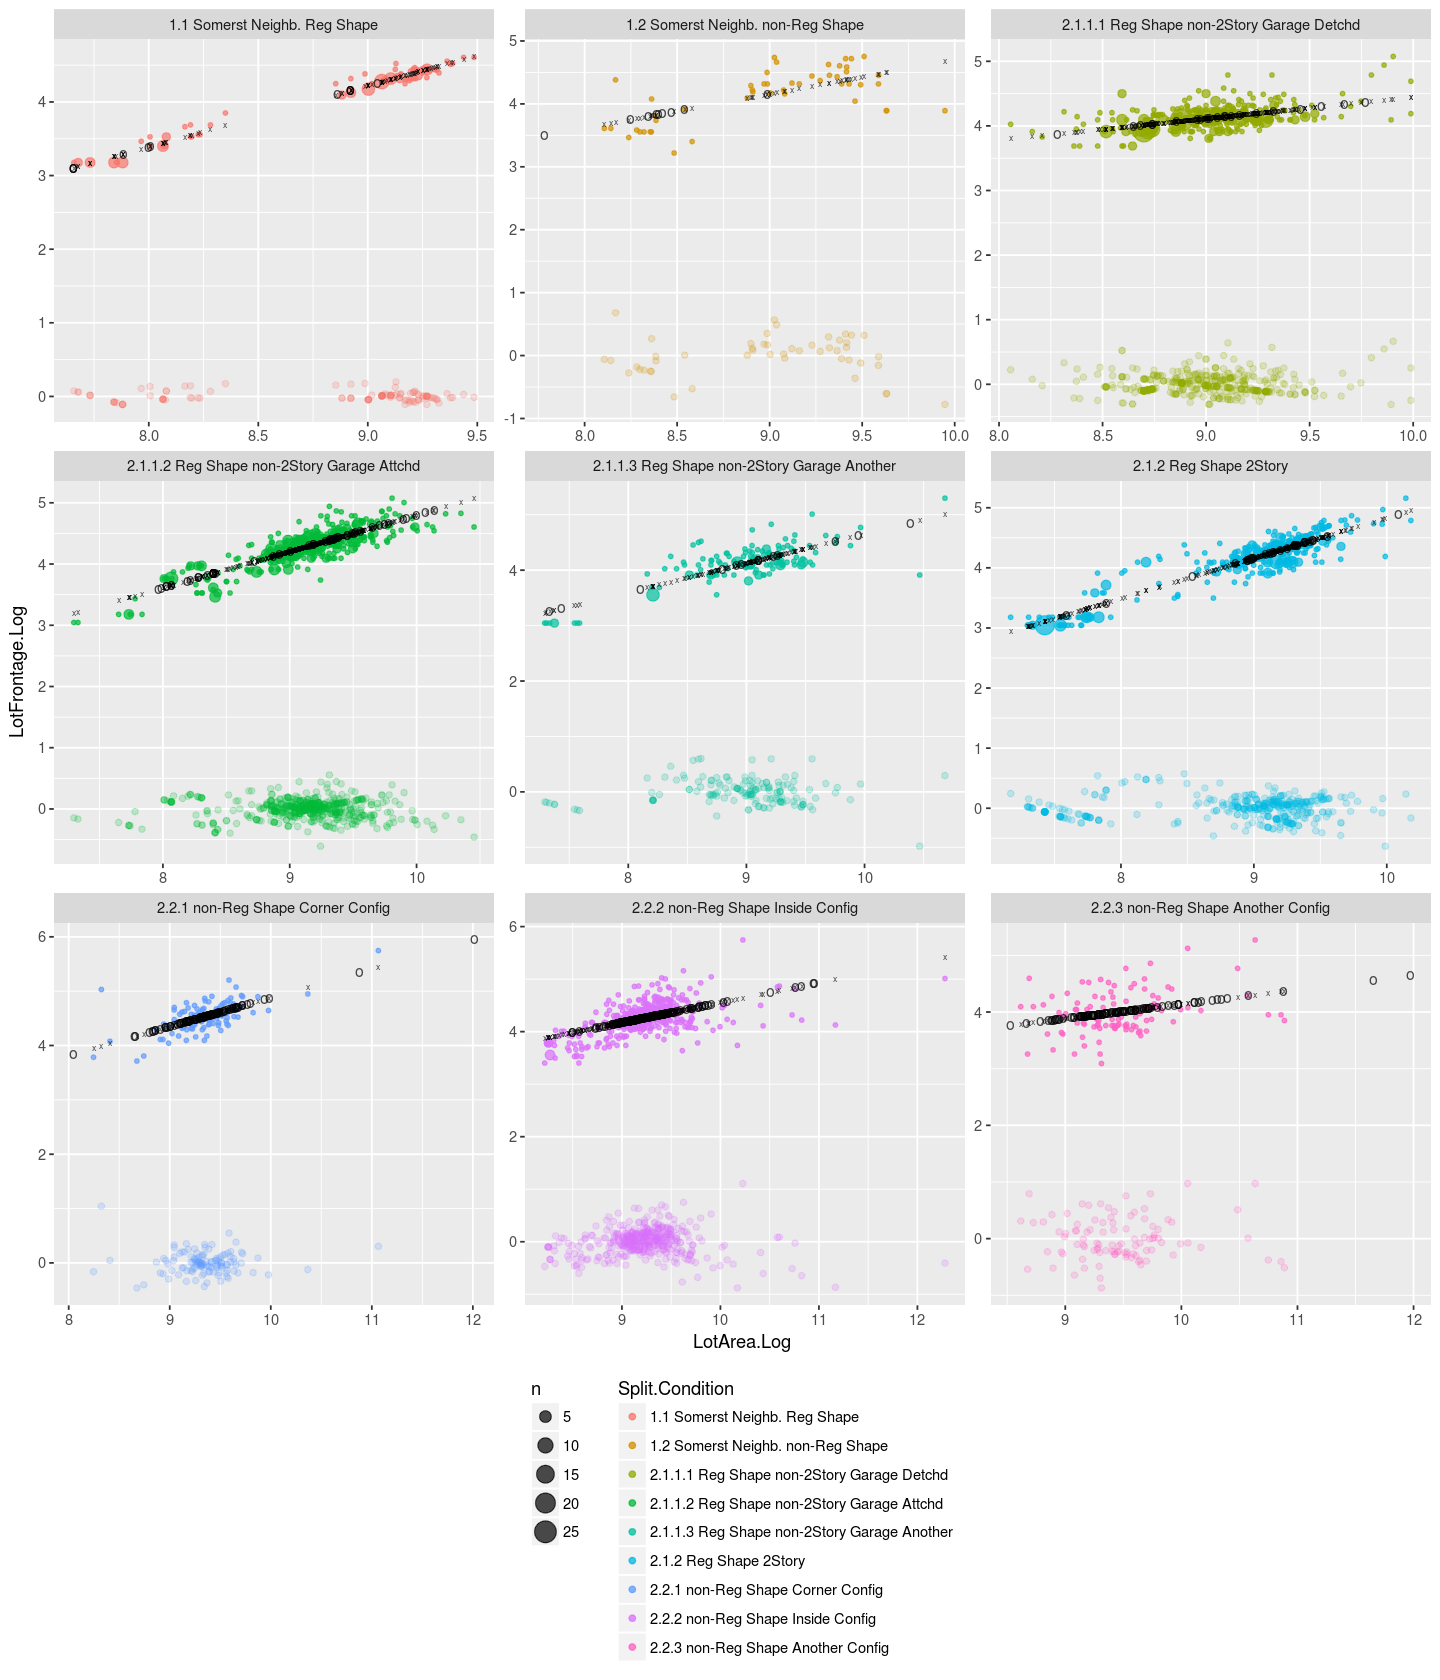

In [31]:
ggplot() +
geom_count(data=d1, aes(x=LotArea.Log, y=LotFrontage.Log, colour = Split.Condition), alpha=0.7) +
geom_point(data=d1, aes(x=LotArea.Log, y=.fitted), alpha=0.7, color="black", shape='x') +
geom_point(data=d2, aes(x=LotArea.Log, y=LotFrontage.Log.Pred), alpha=0.7, color="black", shape='o', size=3) +
facet_wrap(~Split.Condition, scales = "free") +
geom_point(data=d1, aes(x=LotArea.Log, y=.resid, colour=Split.Condition), alpha=0.2) +
theme(legend.position = "bottom", 
      legend.direction = "vertical")